In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
df=pd.read_csv("/content/blogs.csv")

In [49]:
df.head() # displaying the first 5 columns values

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [50]:
df.sample(20) # displaying the random 20

,Data,Labels
498,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.sys.mac.hardware
640,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,misc.forsale
1253,Xref: cantaloupe.srv.cs.cmu.edu sci.electronic...,sci.electronics
888,Newsgroups: rec.motorcycles\nPath: cantaloupe....,rec.motorcycles
1503,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,soc.religion.christian
1380,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,sci.med
356,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.ibm.p...,comp.sys.ibm.pc.hardware
1955,Newsgroups: talk.religion.misc\nPath: cantalou...,talk.religion.misc
285,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,comp.os.ms-windows.misc
1576,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,soc.religion.christian


In [51]:
df.describe(include='all') # displaying the stastical information of the data

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [52]:
df.info() # displaying the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


**From the given data there is the two columns they are the `data` and the `labeles` columns in this**

In [53]:
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [54]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

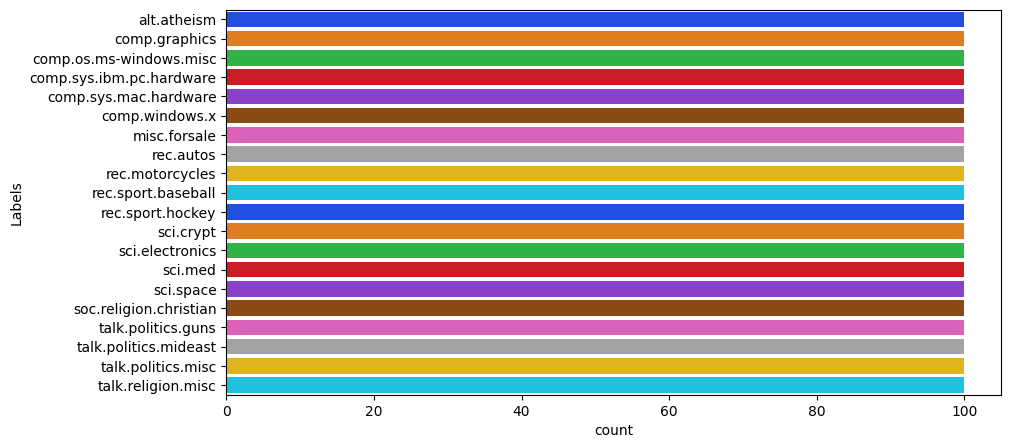

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(df['Labels'],palette='bright')
plt.show()

## **Data Preprocessing**

In [56]:
import re
import string
def clean(text):

  text=re.sub(r"\n"," ",text)

  #remove urls and emails
  text=re.sub(r'\b(?:https?|ftp):\/\/[^\s]+',' ',text) #removes urls
  text=re.sub(r'\b\w+@\w+\.\w+'," ",text) # removes email addresses

  return text

**In this we are defining the function to remove the lines and the urls and mail address**

In [57]:
df['Data'] = df['Data'].apply(clean) # Apply the clean function to the 'data' column of your DataFrame

In [58]:
df.sample(5)

,Data,Labels
249,Newsgroups: comp.os.ms-windows.misc Path: cant...,comp.os.ms-windows.misc
1128,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,sci.crypt
927,Newsgroups: rec.sport.baseball Path: cantaloup...,rec.sport.baseball
655,Xref: cantaloupe.srv.cs.cmu.edu misc.forsale:7...,misc.forsale
639,Newsgroups: misc.forsale Path: cantaloupe.srv....,misc.forsale


In [59]:
def remove_num_pun(text):
    #remove numbers
    text=re.sub(r'\d+'," ",text)
    # Remove special_char characters (punctuation)
    text = re.sub(f'[{string.punctuation}]', ' ', text)
    #remove  spaces
    text=re.sub(r'\s+'," ",text).strip()
    return text

In [60]:
df['Data']=df['Data'].apply(remove_num_pun)

In [61]:
df.sample(5)

,Data,Labels
1338,Xref cantaloupe srv cs cmu edu misc consumers ...,sci.med
1337,Path cantaloupe srv cs cmu edu magnesium club ...,sci.med
611,Path cantaloupe srv cs cmu edu crabapple srv c...,misc.forsale
693,Xref cantaloupe srv cs cmu edu misc forsale re...,misc.forsale
1789,Xref cantaloupe srv cs cmu edu soc culture sov...,talk.politics.mideast


# **Tokenization**

In [62]:
import nltk

nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return " ".join(tokens)

df['Data'] = df['Data'].apply(tokenize_text)
df.sample(5)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Data,Labels
1640,Newsgroups talk politics guns Path cantaloupe ...,talk.politics.guns
1683,Newsgroups talk politics guns Path cantaloupe ...,talk.politics.guns
1586,Path cantaloupe srv cs cmu edu das news harvar...,soc.religion.christian
1955,Newsgroups talk religion misc Path cantaloupe ...,talk.religion.misc
1364,Newsgroups sci med Path cantaloupe srv cs cmu ...,sci.med


In [63]:
df

,Data,Labels
0,Path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism
1,Newsgroups alt atheism Path cantaloupe srv cs ...,alt.atheism
2,Path cantaloupe srv cs cmu edu das news harvar...,alt.atheism
3,Path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism
4,Xref cantaloupe srv cs cmu edu alt atheism tal...,alt.atheism
...,...,...
1995,Xref cantaloupe srv cs cmu edu talk abortion a...,talk.religion.misc
1996,Xref cantaloupe srv cs cmu edu talk religion m...,talk.religion.misc
1997,Xref cantaloupe srv cs cmu edu talk origins ta...,talk.religion.misc
1998,Xref cantaloupe srv cs cmu edu talk religion m...,talk.religion.misc


In [64]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Split the text into words
    words = text.split()
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
# Example usage
df["Data"] = df["Data"].apply(lemmatize_text)
df.head()

,Data,Labels
0,Path cantaloupe srv c cmu edu magnesium club c...,alt.atheism
1,Newsgroups alt atheism Path cantaloupe srv c c...,alt.atheism
2,Path cantaloupe srv c cmu edu da news harvard ...,alt.atheism
3,Path cantaloupe srv c cmu edu magnesium club c...,alt.atheism
4,Xref cantaloupe srv c cmu edu alt atheism talk...,alt.atheism


In [66]:
from wordcloud import WordCloud

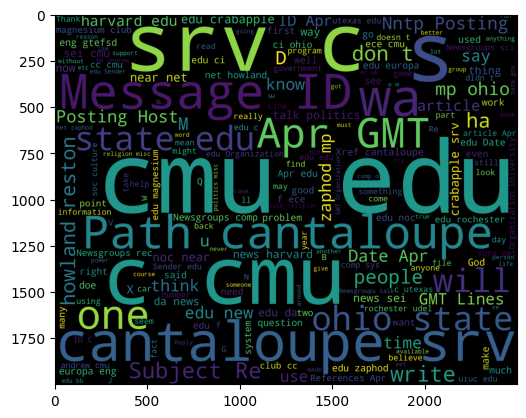

In [67]:
wordcloud_stw = WordCloud( background_color= 'black',
                width = 2500,
                height = 2000).generate(" ".join(df["Data"]))
plt.imshow(wordcloud_stw)

In [68]:
dup_data=df.copy()

In [69]:
dup_data.head()

,Data,Labels
0,Path cantaloupe srv c cmu edu magnesium club c...,alt.atheism
1,Newsgroups alt atheism Path cantaloupe srv c c...,alt.atheism
2,Path cantaloupe srv c cmu edu da news harvard ...,alt.atheism
3,Path cantaloupe srv c cmu edu magnesium club c...,alt.atheism
4,Xref cantaloupe srv c cmu edu alt atheism talk...,alt.atheism


**Train test split the data**

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
dup_data_train,dup_data_test=train_test_split(dup_data,test_size=0.2,random_state=42)

**Applying the count_vectorization**

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
# Initialize CountVectorizer
from nltk.tokenize import word_tokenize
cv=CountVectorizer(
                   stop_words='english',lowercase=True,
                   strip_accents='unicode',analyzer=word_tokenize) # Use the str.split method for tokenization

#fit CountVectorization
cv.fit(dup_data_train["Data"])

CountVectorizer(analyzer=<function word_tokenize at 0x7b0fea32ac00>,
                stop_words='english', strip_accents='unicode')

In [74]:
cv_train_features=cv.transform(dup_data_train["Data"])
cv_test_features=cv.transform(dup_data_test["Data"])

In [75]:
cv_train_features.shape , cv_test_features.shape

((1600, 39133), (400, 39133))

**Applying the naive Bayes model**

In [76]:

from sklearn.naive_bayes import MultinomialNB as MB
import numpy as np

# Initialize the Multinomial Naive Bayes classifier
classifier_mb = MB()

# Train the classifier, Use cv_train_features instead of dup_data_features
classifier_mb.fit(cv_train_features, dup_data_train["Labels"])


# Test predictions and accuracy
test_pred_m = classifier_mb.predict(cv_test_features)
accuracy_test_m = np.mean(test_pred_m == dup_data_test["Labels"])
print(f'Test Accuracy: {accuracy_test_m * 100:.2f}%')

Test Accuracy: 67.50%


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(
    stop_words='english',
    lowercase=True,
    strip_accents='unicode',
    analyzer=word_tokenize )

# Fit and transform the training data
tfidf.fit(dup_data_train["Data"])

# Transform the training and test data
tfidf_train_features = tfidf.transform(dup_data_train["Data"])
tfidf_test_features = tfidf.transform(dup_data_test["Data"])

# Print the shape of the transformed features to see the dimensionality
print(tfidf_train_features.shape)
print(tfidf_test_features.shape)

(1600, 39133)
(400, 39133)


In [78]:


classifier_mb_tfidf = MB()

# Train the classifier using TF-IDF features
classifier_mb_tfidf.fit(tfidf_train_features, dup_data_train["Labels"])

# Test predictions and accuracy
test_pred_m = classifier_mb_tfidf.predict(tfidf_test_features)
accuracy_test_m = np.mean(test_pred_m == dup_data_test["Labels"])
print(f'Test Accuracy: {accuracy_test_m * 100:.2f}%')

Test Accuracy: 76.00%


**Sentiment Analysis**


In [79]:
!pip install afinn

In [80]:
from afinn import Afinn

**************************************************
                                                Data  Sentiment_Score
0  Path cantaloupe srv c cmu edu magnesium club c...            -17.0
1  Newsgroups alt atheism Path cantaloupe srv c c...              8.0
2  Path cantaloupe srv c cmu edu da news harvard ...            -29.0
3  Path cantaloupe srv c cmu edu magnesium club c...           -130.0
4  Xref cantaloupe srv c cmu edu alt atheism talk...              8.0


**************************************************
Sentiment_Category
Positive    1256
Negative     636
Neutral      108
Name: count, dtype: int64
**************************************************


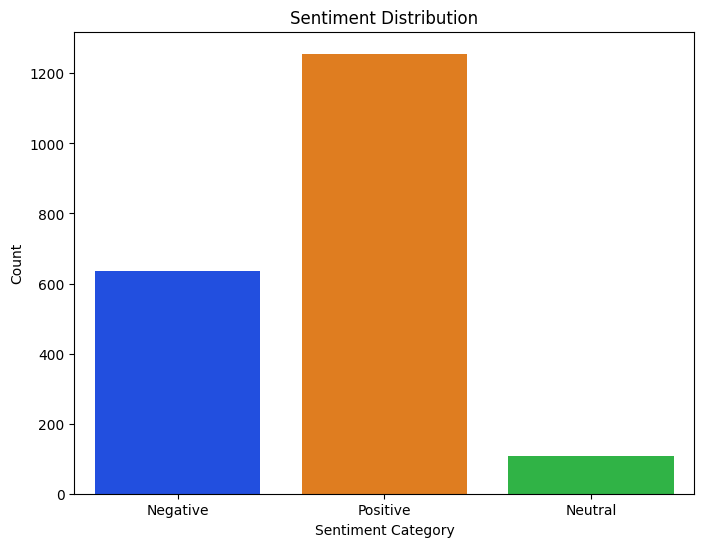

In [81]:
# Sentiment Analysis using Afinn
afinn = Afinn()

def get_sentiment(text):
    return afinn.score(text)

dup_data['Sentiment_Score'] = dup_data['Data'].apply(get_sentiment)

print('*'*50)
print(dup_data[['Data', 'Sentiment_Score']].head())


# Categorize sentiment based on score
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

print("\n")


dup_data['Sentiment_Category'] = dup_data['Sentiment_Score'].apply(categorize_sentiment)

# Analyze sentiment distribution
sentiment_counts = dup_data['Sentiment_Category'].value_counts()
print("*"*50)
print(sentiment_counts)
print("*"*50)
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Category', data=dup_data, palette='bright')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate the evaluation metrics
accuracy = accuracy_score(dup_data_test["Labels"], test_pred_m)
precision = precision_score(dup_data_test["Labels"], test_pred_m, average='weighted')
recall = recall_score(dup_data_test["Labels"], test_pred_m, average='weighted')
f1 = f1_score(dup_data_test["Labels"], test_pred_m, average='weighted')


In [83]:
print(f"Accuracy: {accuracy:.2f}")
print("~"*20)
print(f"Precision: {precision:.2f}")
print("~"*20)
print(f"Recall: {recall:.2f}")
print("~"*20)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.76
~~~~~~~~~~~~~~~~~~~~
Precision: 0.82
~~~~~~~~~~~~~~~~~~~~
Recall: 0.76
~~~~~~~~~~~~~~~~~~~~
F1 Score: 0.76
